In [30]:
# install TweePy package

!pip install tweepy 
!pip install botometer


ERROR: Could not find a version that satisfies the requirement scipy.misc (from versions: none)
ERROR: No matching distribution found for scipy.misc


In [51]:

!pip install wordcloud

  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\nikhi\\onedrive\\softwares\\anaconda\\lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ERROR: Could not find a version that satisfies the requirement scipy.misc.pilutil (from versions: none)
ERROR: No matching distribution found for scipy.misc.pilutil


In [79]:
# import libraries

import tweepy
from textblob import TextBlob
import re
import sys
import csv
import botometer
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import imageio

In [33]:
# Removed access keys and tokens for security purpose

access_token = ''
access_token_secret = ''
consumer_key = ''
consumer_secret = ''

In [3]:
# authorize access to TweePy

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [22]:
# Fetch tweets

tweets = []
sentiments =[]
count = 1
query = "#drinkbleachfortrump OR #disinfectant OR #injectbleach OR #injectdisenfectant OR #uvlight OR #BleachBoy OR #TrumpHasNoPlan OR #TrumpIsAnIdiot OR drinkbleachfortrump OR disinfectant OR injectbleach"
for tweet in tweepy.Cursor(api.search,q=query,count=450,since='2020-05-13').items(1):
    print(count)
    count+=1
    
    try:
        data = [tweet.created_at,tweet.id,tweet.text,tweet.source,tweet.retweet_count,tweet.user._json['screen_name'],tweet.user._json['created_at'],tweet.user._json['location'],tweet.coordinates,tweet.entities['urls']]
        data = tuple(data)
        tweets.append(data)
        
    except tweepy.TweepError as e:
        print(e.reason)
        continue
    
    try:
        sentiment_data = [tweet.created_at,tweet.text]
        sentiment_data = tuple(sentiment_data)
        textWords=sentiment_data[1].split()
        #clean tweets
        cleanedTweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)", " ", sentiment_data[1]).split())
        analysis= TextBlob(cleanedTweet)
        polarity = 'Positive'
        if(analysis.sentiment.polarity < 0):
            polarity = 'Negative'
        if(0<=analysis.sentiment.polarity <=0.2):
            polarity = 'Neutral'
        #print (polarity)
        dic={}
        dic['Sentiment']=polarity
        dic['Tweet']=cleanedTweet
        dic['Polarity'] = analysis.sentiment.polarity
        dic['Created_at'] = sentiment_data[0]
        sentiments.append(dic)
        
    except tweepy.TweepError as e:
        print(e.reason)
        continue
    
    except StopIteration:
        break
        
df_analysis = pd.DataFrame(tweets, columns = ['created_at','tweet_id','tweet_text','tweet_source','retweet_count','screen_name','account_creation_date','location','coordinates','urls'])
df_analysis.to_csv('/Users/naras/OneDrive/Documents/DEPA/FinalProject/Project_data/Project_data(P&C)/dummy1.csv')

df_sentiment=pd.DataFrame(sentiments)
df_sentiment.to_csv('/Users/naras/OneDrive/Documents/DEPA/FinalProject/Project_data/Project_data(P&C)/dummy.csv')

1


In [1]:
import glob
import re
import pandas as pd

In [4]:
all_filenames = [i for i in glob.glob('*.csv')]
print(all_filenames)

['Combined_tweets_dataset.csv']


In [5]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "Combined_tweets_dataset.csv", index=False, encoding='utf-8')

In [6]:
pwd

'C:\\Users\\nikhi\\Downloads\\tweets'

In [6]:
#df1 = pd.read_csv("FULLDATASET.csv")
df1 = pd.read_csv("FULLDATASET.csv",encoding = "ISO-8859-1", low_memory=False)

In [41]:
df1.head()

,created_at,tweet_id,tweet_text,tweet_source,retweet_count,screen_name,account_creation_date,location,coordinates
0,2020-05-22 16:10:36,ID1263864848657637376,@GuillaumeQ1T1 @newtonmouloud @BrunoLeMaire Ce...,Twitter for Android,0,tccm1982,Wed Feb 13 23:40:31 +0000 2013,NaN,NaN
1,2020-05-22 16:10:51,ID1263864913954344962,RT @ckuster_ou: I like the concept that there ...,Twitter for Android,77,BruceTabor8,Thu Feb 13 05:26:08 +0000 2020,NaN,NaN
2,2020-05-22 16:10:58,ID1263864943356436480,@CNN #WUHANVIRUS\n#CHINAVIRUS\n\n#HYDROXYSAVES...,Twitter Web App,0,LiToBo2004,Sun Sep 03 04:01:07 +0000 2017,California,NaN
3,2020-05-22 16:11:00,ID1263864950595952645,"Toronto Parks are open, but stay safe and phys...",Twitter for Android,1,DanielBreaking,Wed Apr 15 01:52:33 +0000 2020,NaN,NaN
4,2020-05-22 16:11:05,ID1263864973706563585,RT @WDGPublicHealth: Tips on what to do and wh...,Twitter for iPhone,10,SJAGuelph,Sun Jul 17 16:19:12 +0000 2016,"Guelph, Ontario",NaN


In [55]:
#Creating a new Dataframe having copy of few columns from the original dataframe

df2 = df1[['retweet_count', 'tweet_text', 'tweet_id']].copy()
df2.head()

,retweet_count,tweet_text,tweet_id
0,0,@GuillaumeQ1T1 @newtonmouloud @BrunoLeMaire Ce...,ID1263864848657637376
1,77,RT @ckuster_ou: I like the concept that there ...,ID1263864913954344962
2,0,@CNN #WUHANVIRUS\n#CHINAVIRUS\n\n#HYDROXYSAVES...,ID1263864943356436480
3,1,"Toronto Parks are open, but stay safe and phys...",ID1263864950595952645
4,10,RT @WDGPublicHealth: Tips on what to do and wh...,ID1263864973706563585


In [71]:
#Sorting the retweet count in descending order and displaying highest number of retweets for a tweet and its tweet_id

df2_sort=df2.sort_values(by='retweet_count', axis=0, ascending=False, inplace=False, kind='quicksort')
df2_sort.head(10)

,retweet_count,tweet_text,tweet_id
38752,102706,RT @realDonaldTrump: HYDROXYCHLOROQUINE &amp; ...,ID1265068205069889536
73787,74316,RT @ippansyaryou: ä¹ ãã¶ãã«ããã£ã¢ç...,ID1265129576465752066
60722,72528,RT @mightbesalem: heâs not a drug dealer mom...,ID1265106727390736385
16255,72118,RT @Daniel_Lewis3: Here is Dr. Birx's reaction...,ID1264693309953335297
16765,72118,RT @Daniel_Lewis3: Here is Dr. Birx's reaction...,ID1264702316214714368
13808,72118,RT @Daniel_Lewis3: Here is Dr. Birx's reaction...,ID1264651906112258049
49041,72117,RT @Daniel_Lewis3: Here is Dr. Birx's reaction...,ID1265086843630084098
75634,72117,RT @Daniel_Lewis3: Here is Dr. Birx's reaction...,ID1265135437737164805
60058,65373,RT @prescribedmeth: DRUG SA-A-ALE.... WHAT THE...,ID1265105509557796866
56280,63710,RT @getyourcrispy: 5555555555555à¹à¸¡à¹à¹à¸...,ID1265098865985765376


In [7]:
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(df1['tweet_text'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1
            

In [22]:
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:50]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

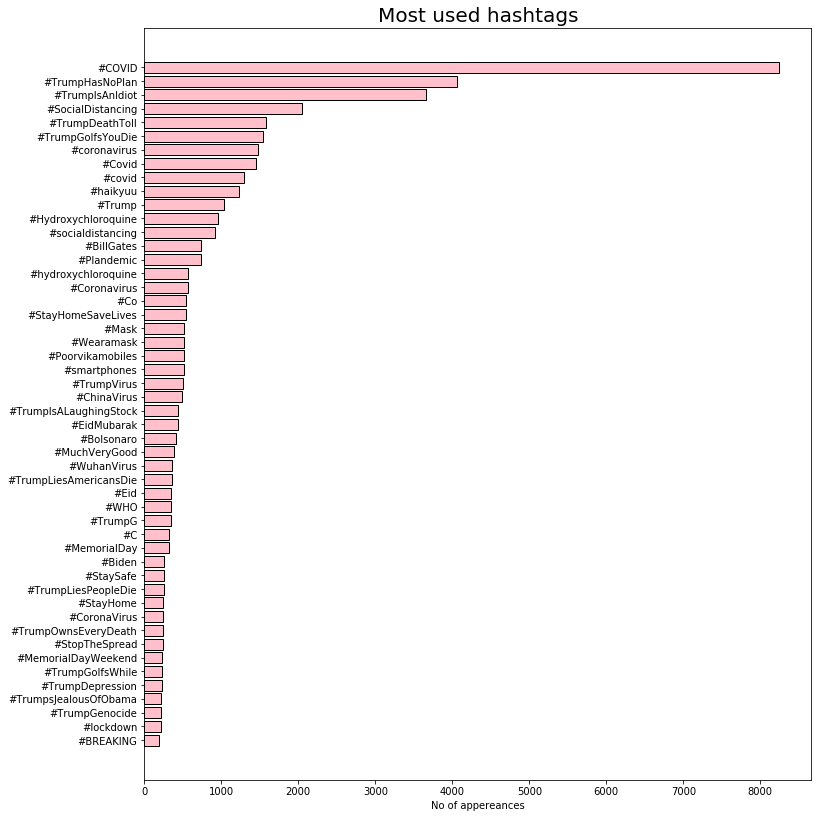

In [23]:
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'pink', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("No of appereances")
ax.set_title("Most used hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

In [24]:
hash_df = pd.DataFrame(hashtag_ordered_keys)

In [13]:
hash_df[0]

0                     #COVID
1            #TrumpHasNoPlan
2            #TrumpIsAnIdiot
3          #SocialDistancing
4            #TrumpDeathToll
5          #TrumpGolfsYouDie
6               #coronavirus
7                     #Covid
8                     #covid
9                   #haikyuu
10                    #Trump
11       #Hydroxychloroquine
12         #socialdistancing
13                #BillGates
14                #Plandemic
15       #hydroxychloroquine
16              #Coronavirus
17                       #Co
18        #StayHomeSaveLives
19                     #Mask
20                #Wearamask
21          #Poorvikamobiles
22              #smartphones
23               #TrumpVirus
24               #ChinaVirus
25    #TrumpIsALaughingStock
26               #EidMubarak
27                #Bolsonaro
28             #MuchVeryGood
29               #WuhanVirus
Name: 0, dtype: object

In [25]:
Hashtag_Combined = " ".join(hash_df[0].values.astype(str))

In [15]:
Hashtag_Combined

'#COVID #TrumpHasNoPlan #TrumpIsAnIdiot #SocialDistancing #TrumpDeathToll #TrumpGolfsYouDie #coronavirus #Covid #covid #haikyuu #Trump #Hydroxychloroquine #socialdistancing #BillGates #Plandemic #hydroxychloroquine #Coronavirus #Co #StayHomeSaveLives #Mask #Wearamask #Poorvikamobiles #smartphones #TrumpVirus #ChinaVirus #TrumpIsALaughingStock #EidMubarak #Bolsonaro #MuchVeryGood #WuhanVirus'

In [26]:
no_millennials = " ".join([word for word in Hashtag_Combined.split()])

In [17]:
no_millennials

'#COVID #TrumpHasNoPlan #TrumpIsAnIdiot #SocialDistancing #TrumpDeathToll #TrumpGolfsYouDie #coronavirus #Covid #covid #haikyuu #Trump #Hydroxychloroquine #socialdistancing #BillGates #Plandemic #hydroxychloroquine #Coronavirus #Co #StayHomeSaveLives #Mask #Wearamask #Poorvikamobiles #smartphones #TrumpVirus #ChinaVirus #TrumpIsALaughingStock #EidMubarak #Bolsonaro #MuchVeryGood #WuhanVirus'

In [81]:
Tweet_mask = imageio.imread("emblem-Twitter.jpg")

In [82]:
def generate_wordcloud(no_millennials, Tweet_mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=Tweet_mask).generate(no_millennials)
    plt.figure(figsize=(10,10),facecolor = 'white')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

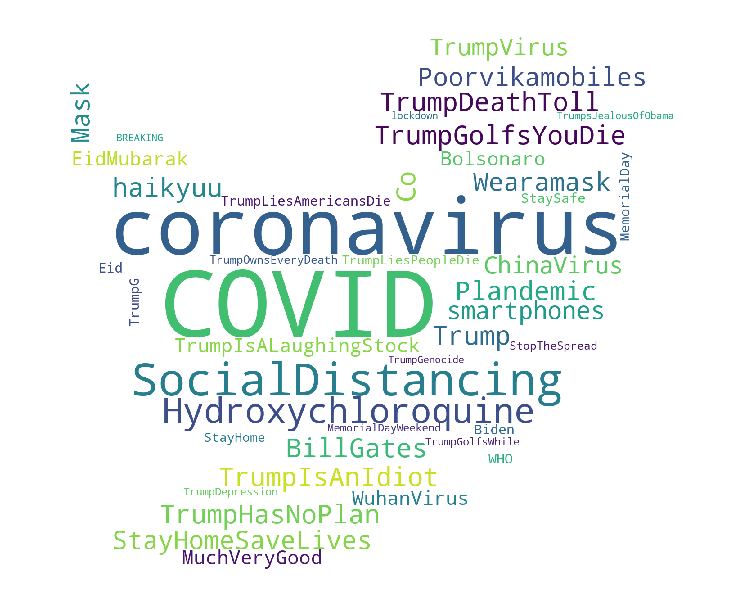

<Figure size 432x288 with 0 Axes>

In [83]:
generate_wordcloud(no_millennials, Tweet_mask)


In [94]:
WordCloud.to_file('Desktop/Twitter_wordcloud.png')

TypeError: to_file() missing 1 required positional argument: 'filename'

In [88]:
plt.savefig('Twitter_wordcloud.jpg')
plt.close(fig)

<Figure size 432x288 with 0 Axes>

In [30]:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(df1['tweet_text'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

In [31]:
#the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous #list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

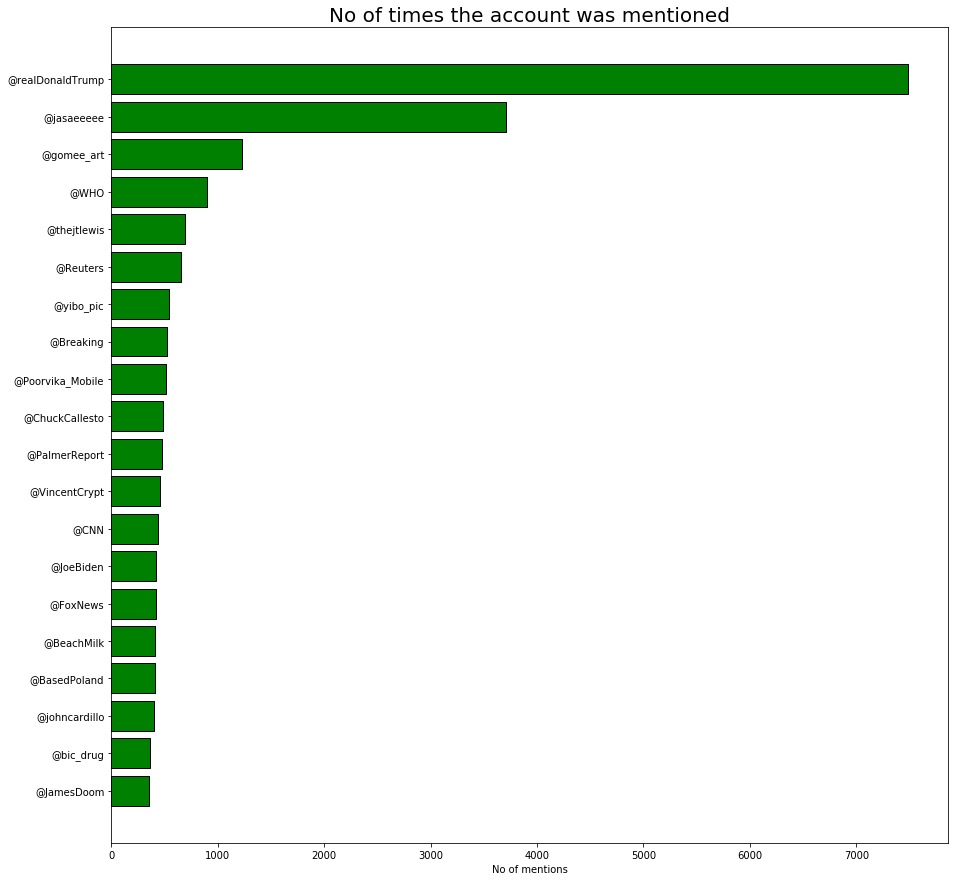

In [32]:
fig, ax = plt.subplots(figsize = (15,15))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("No of mentions")
ax.set_title("No of times the account was mentioned", fontsize = 20)

plt.show()

In [33]:
#Going to see who are the users who have tweeted or retweeted the #most and see how
#Likely it is that they are bots
usertweets = df1.groupby('screen_name')
#Taking the top 25 tweeting users
top_users = usertweets.count()['tweet_text'].sort_values(ascending = False)[:25]
top_users_dict = top_users.to_dict()
user_ordered_dict =sorted(top_users_dict.items(), key=lambda x:x[1])
user_ordered_dict = user_ordered_dict[::-1]
#Now, like in the previous hashtags and mention cases, going to make #two lists, one with the username and one with the value
dict_values = []
dict_keys = []
for item in user_ordered_dict[0:25]:
    dict_keys.append(item[0])
    dict_values.append(item[1])

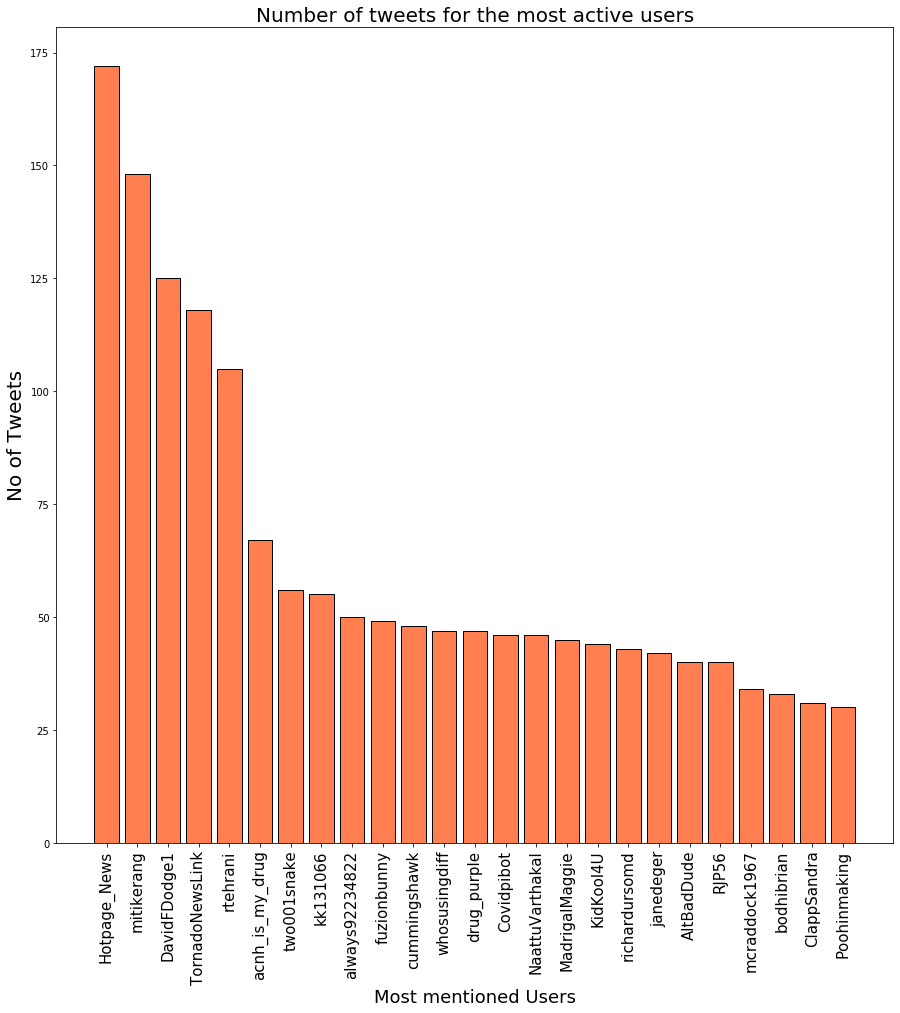

In [34]:
#Plot these results
fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1, color ='coral')
plt.xlabel('Most mentioned Users', fontsize = 18)
plt.ylabel('No of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
plt.title('Number of tweets for the most active users', fontsize = 20)
plt.show()

In [35]:
rapidapi_key = ""
#Removed access keys and tokens for security purpose
twitter_app_auth = {
    'access_token' : "",
    'access_token_secret' : "",
    'consumer_key' : "",
    'consumer_secret' : "",    
}


In [39]:
#Connecting to the botometer API
bom = botometer.Botometer(wait_on_ratelimit = True, rapidapi_key = rapidapi_key, **twitter_app_auth)
#Returns a dictionary with the most active users and the porcentage #of likeliness of them being a Bot using botometer
bot_dict = {}
top_users_list = dict_keys
for user in top_users_list:
    user = '@'+ user
    try:
        result = bom.check_account(user)
        bot_dict[user] = int((result['scores']['english'])*100)
    except tweepy.TweepError:
        bot_dict[user] = 0
        continue
print(bot_dict)

{'@Hotpage_News': 70, '@mitikerang': 18, '@DavidFDodge1': 25, '@TornadoNewsLink': 54, '@rtehrani': 20, '@acnh_is_my_drug': 22, '@two001snake': 30, '@kk131066': 83, '@always92234822': 25, '@fuzionbunny': 12, '@cummingshawk': 15, '@whosusingdiff': 44, '@drug_purple': 19, '@Covidpibot': 0, '@NaattuVarthakal': 46, '@MadrigalMaggie': 20, '@KidKool4U': 63, '@richardursomd': 10, '@janedeger': 54, '@AltBadDude': 32, '@RJP56': 7, '@mcraddock1967': 61, '@bodhibrian': 3, '@ClappSandra': 7, '@Poohinmaking': 20}


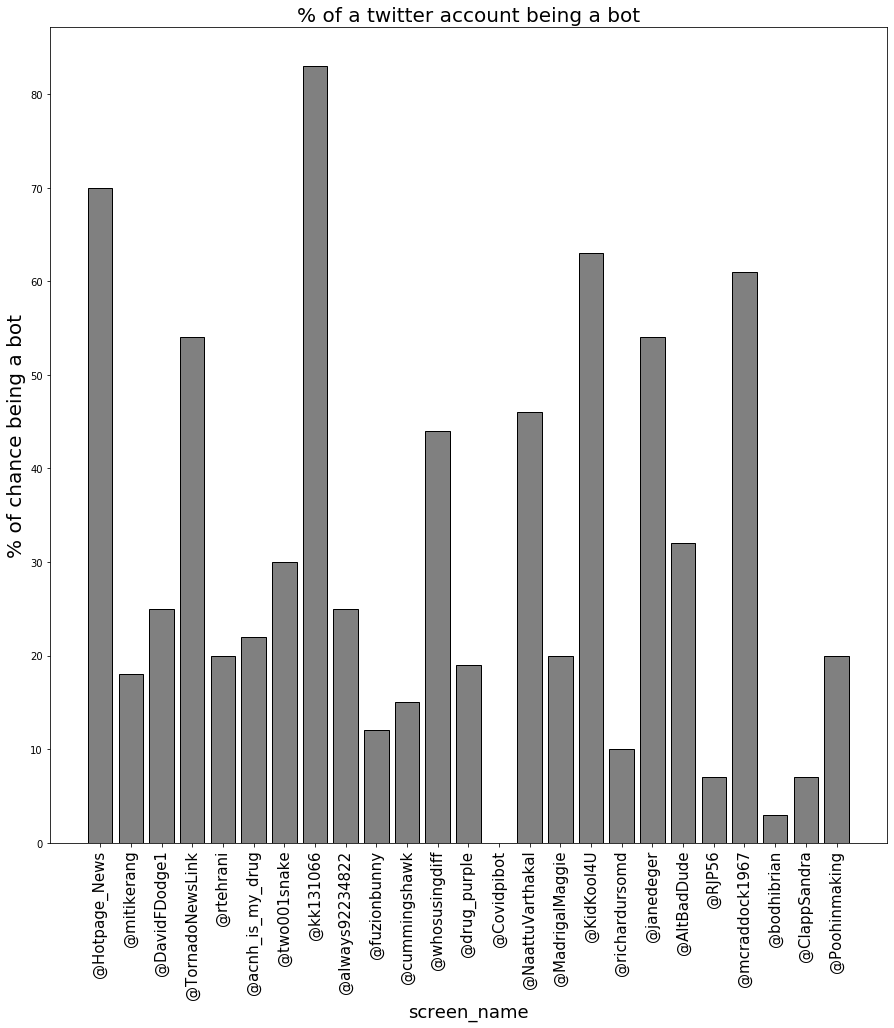

In [40]:
#Plot these results
fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, bot_dict.values(), edgecolor = 'black', linewidth=1, color = 'grey')
plt.xlabel('screen_name', fontsize = 18)
plt.ylabel('% of chance being a bot', fontsize=20)
plt.xticks(index,bot_dict.keys(), fontsize=15, rotation=90)
plt.title('% of a twitter account being a bot', fontsize = 20)
plt.show()

In [149]:
#Tweet Sources
source = df1.groupby('tweet_source')
sourcecount = source['tweet_text'].count()
source_dict = sourcecount.to_dict()
source_list =sorted(source_dict.items(), key=lambda x:x[1])
source_list = source_list[::-1]
source_dict_values = []
source_dict_keys = []
for item in source_list[0:30]:
    source_dict_keys.append(item[0])
    source_dict_values.append(item[1])

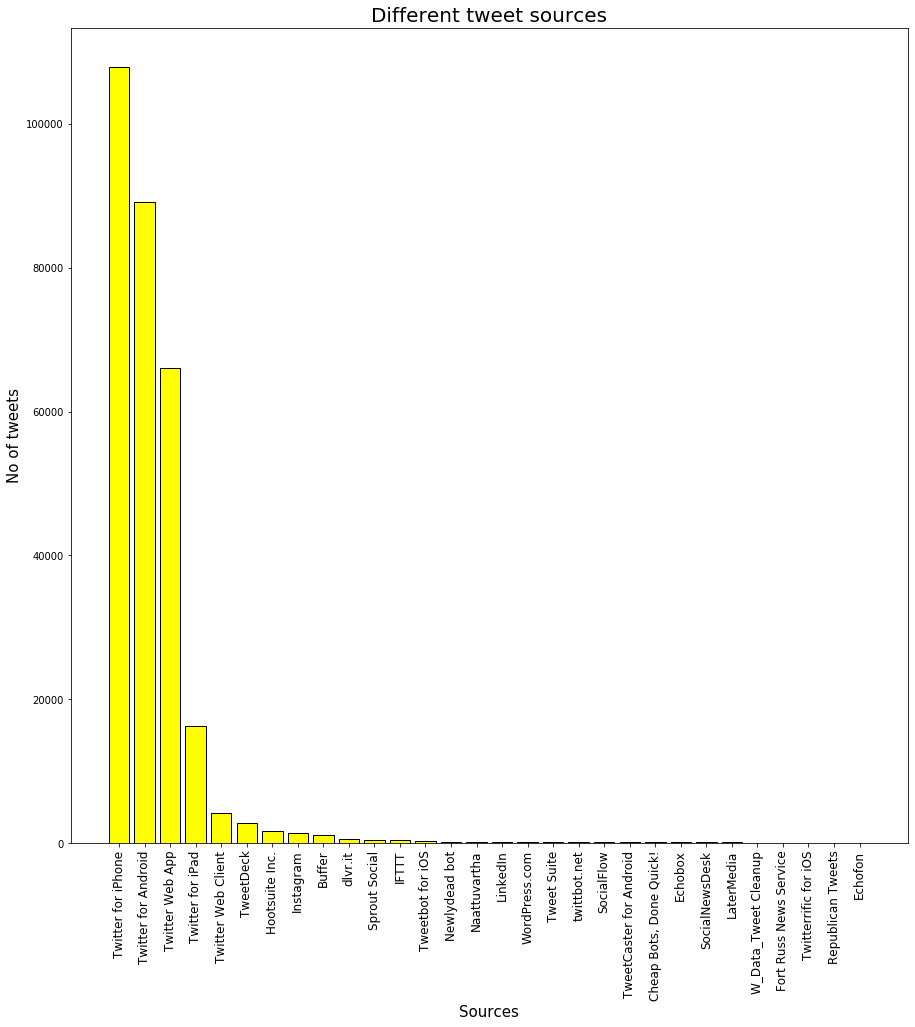

In [164]:
fig = plt.figure(figsize = (15,15))
index = np.arange(len(source_dict_keys))
plt.bar(index, source_dict_values, edgecolor = 'black', linewidth=1, color = 'yellow')
plt.xlabel('Sources', fontsize = 15)
plt.ylabel('No of tweets', fontsize=15)
plt.xticks(index, source_dict_keys, fontsize=12, rotation=90)
plt.title('Different tweet sources', fontsize = 20)
plt.show()